In [32]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix
import pandas as pd


print('Kütüphaneler Aktarıldı')

Kütüphaneler Aktarıldı


In [33]:
! git clone https://github.com/shnkrg/vt.git

fatal: destination path 'vt' already exists and is not an empty directory.


In [34]:
import os
main_dir = "/content/vt/Data"
train_dir = os.path.join(main_dir, 'train')

test_dir = os.path.join(main_dir, 'test')

train_covid_dir = os.path.join(train_dir, 'COVID19')

train_normal_dir = os.path.join(train_dir, 'NORMAL')

test_covid_dir  = os.path.join(test_dir, 'COVID19')

test_normal_dir =  os.path.join(test_dir, 'NORMAL')

In [35]:
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)
test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

In [36]:
print("Eğitim setinde bulunan toplam dosya:" , len(train_covid_names+train_normal_names))
print("Test setinde bulunan toplam dosya:" , len(test_covid_names+test_normal_names))

Eğitim setinde bulunan toplam dosya: 1810
Test setinde bulunan toplam dosya: 480


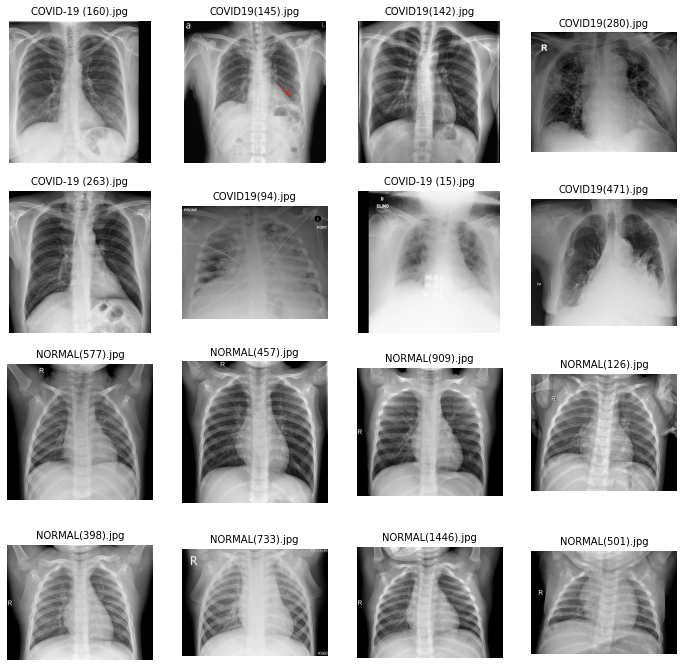

In [37]:
#Veri Görüntüleme
import matplotlib.image as mpimg
rows = 4
cols = 4
fig = plt.gcf()
fig.set_size_inches(12,12)
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

merged_list = covid_pic+normal_pic
for i, img_path in enumerate(merged_list):
    data = img_path.split('/',6)[6]
    sp = plt.subplot(rows,cols,i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(data,fontsize=10)
    plt.imshow(img,cmap='gray')
    
plt.show()
    

In [39]:
#Veri Ön İşleme 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator (rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
                                                 
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
                                                 
test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 361 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [40]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [41]:
train_generator.image_shape

(150, 150, 3)

In [42]:
#Sinir Ağı Oluşturma Modeli

model = Sequential()
model.add(Conv2D(32,(5,5), padding = 'SAME', activation='relu' , input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64 ,(5,5),padding='SAME', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

In [43]:
#Modeli Eğitimi

test = model.compile(Adam(lr=0.001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [44]:
#Derin Öğrenme

history = model.fit(train_generator, epochs = 30, validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 47s 1s/step - loss: 2.5559 - accuracy: 0.6750 - val_loss: 0.3932 - val_accuracy: 0.8947
Epoch 2/30
46/46 [==============================] - 45s 981ms/step - loss: 0.3007 - accuracy: 0.8664 - val_loss: 0.3809 - val_accuracy: 0.9252
Epoch 3/30
46/46 [==============================] - 45s 979ms/step - loss: 0.2075 - accuracy: 0.9338 - val_loss: 0.1343 - val_accuracy: 0.9612
Epoch 4/30
46/46 [==============================] - 45s 977ms/step - loss: 0.1639 - accuracy: 0.9406 - val_loss: 0.1891 - val_accuracy: 0.9501
Epoch 5/30
46/46 [==============================] - 45s 980ms/step - loss: 0.1849 - accuracy: 0.9390 - val_loss: 0.1475 - val_accuracy: 0.9640
Epoch 6/30
46/46 [==============================] - 45s 980ms/step - loss: 0.1452 - accuracy: 0.9533 - val_loss: 0.1024 - val_accuracy: 0.9612
Epoch 7/30
46/46 [==============================] - 45s 984ms/step - loss: 0.1430 - accuracy: 0.9468 - val_loss: 0.1128 - val_accuracy: 0.9751
Ep

In [45]:
#Performans Değerlendirmesi
#Nesnelerin anahtarını getir

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

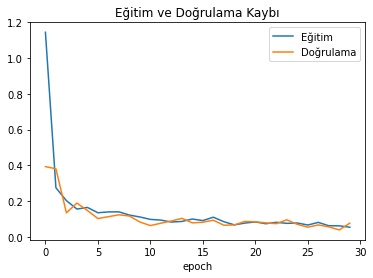

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Eğitim','Doğrulama'])
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

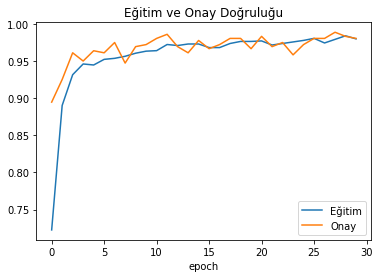

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Eğitim','Onay'])
plt.title('Eğitim ve Onay Doğruluğu')
plt.xlabel('epoch')

In [48]:
#Testin doğruluk ve kaybını öğrenin.
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc : {}'.format(test_loss, test_acc))

15/15 [==============================] - 9s 634ms/step - loss: 0.0603 - accuracy: 0.9812
test loss:0.060292184352874756 test acc : 0.981249988079071


In [49]:
error_rate= 1- test_acc
print("Hata Oranı: ",error_rate)

Hata Oranı:  0.018750011920928955


In [50]:
#Dosya Seçin ve Test Edin
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = "/content/"+filename
  img = image.load_img(img_path, target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0:
    print('Covid Pozitif')
  else:
    print('Covid Negatif')

Saving covid2.jpeg to covid2.jpeg
covid2.jpeg
Covid Pozitif
